# Homework_2_Rachel_Cao MFE-preprogram-python

Include each of the packages that will be used in the Jupyter Notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

%matplotlib inline

### Get the time series for the following cryptocurrencies using 'cryptowat.ch' starting from 2021-11-22, hourly data
<li>ETH</li>
<li>SOL</li>
<li>AVAX</li>
<li>USDT</li>
<li>FLOW</li>

The get_data function was shown in lecture2, there was a hint in using kraken and coin-base

In [17]:
def get_data(token):
    
    ## this was from the slack hint, use kraken for FLOW and coinbase-pro for the other cryptos
    ex = 'kraken' if token == 'FLOW' else 'coinbase-pro'
    
    res = requests.get(
        f'https://api.cryptowat.ch/markets/{ex}/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )
    
    df = pd.DataFrame(
    res.json()['result']['3600'],
    columns=['ts', 'open', 'high','low', 'close', 'volume', 'volumeUSD']
    )
    
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [18]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT', 'FLOW']

The tokens in this list are able to be looped using the function get_data with the following dataframe concatenation, this is from lecture 2 notes.

In [20]:
df_base = pd.concat(get_data(token) for token in tokens)

Let's change the index similar to the lecture as well:

In [21]:
df = df_base.set_index('ts')

### Get the total USD volume traded for each token in a dataframe, sorted from hightest to lowest volume.

Another this to note is that the df will be grouped by the token with the volumeUSD.sum() to find the volume traded for each token.

In [31]:
df.groupby('token')['volumeUSD'].sum().to_frame()

,volumeUSD
token,
AVAX,4.980809e+09
ETH,2.677704e+10
FLOW,1.019111e+08
SOL,8.880496e+09
USDT,2.453497e+09


The default parameter for the .sort_values() method is to have ascending=True. To show the highest value first, use ascending=False

In [32]:
df.sort_values('volumeUSD', ascending=False)

,open,high,low,close,volume,volumeUSD,token
ts,,,,,,,
2021-12-04 06:00:00,4022.660,4038.800,3575.000,3884.540,97097.417492,3.702769e+08,ETH
2021-12-15 20:00:00,3811.380,3989.000,3760.980,3972.000,62360.886127,2.444909e+08,ETH
2021-12-03 21:00:00,4229.090,4229.090,4035.000,4212.340,51723.840085,2.147795e+08,ETH
2021-12-03 17:00:00,4469.680,4469.680,4320.000,4344.510,44978.935447,1.973315e+08,ETH
2021-11-26 09:00:00,4347.500,4347.510,4005.000,4102.940,44525.053932,1.846590e+08,ETH
...,...,...,...,...,...,...,...
2021-12-01 05:00:00,12.542,12.557,12.513,12.513,100.807992,1.262889e+03,FLOW
2021-12-21 19:00:00,8.254,8.259,8.248,8.259,113.290941,9.350726e+02,FLOW
2021-12-12 13:00:00,9.120,9.129,9.113,9.113,91.891926,8.382021e+02,FLOW


### Add a column that calculates the close price ratio between ETH and SOL for each hour:

ETH['close']/SOL['close'] for each period

Let's check the dataframe for the ETH and SOL tokens

In [95]:
df.loc[df['token']=='ETH']

,open,high,low,close,volume,volumeUSD,token
ts,,,,,,,
2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH
2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH
2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH
2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH
2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...
2021-12-22 21:00:00,3998.42,4015.00,3990.29,4007.26,7309.694739,2.927050e+07,ETH
2021-12-22 22:00:00,4008.20,4022.00,4001.43,4015.53,4524.634283,1.815874e+07,ETH
2021-12-22 23:00:00,4015.61,4021.24,3992.35,4003.20,3102.249371,1.241756e+07,ETH


In [96]:
df.loc[df['token']=='SOL']['close']

ts
2021-11-22 00:00:00    230.785
2021-11-22 01:00:00    226.000
2021-11-22 02:00:00    227.037
2021-11-22 03:00:00    223.117
2021-11-22 04:00:00    220.652
                        ...   
2021-12-22 21:00:00    180.120
2021-12-22 22:00:00    181.610
2021-12-22 23:00:00    181.440
2021-12-23 00:00:00    178.450
2021-12-23 01:00:00    178.380
Name: close, Length: 746, dtype: float64

df['close_ratio_ETH_SOL'] = df.loc[df['token']=='ETH'['close']/df.loc[df['token']=='ETH'['close']

But in reality, these two dataframes are part of the same dataframe. In order to create a new column that only acts on these two alone, the two dataframes need to be merged and then a calculation that only acts on those two sets.

In [61]:
df_closing = pd.merge(
    df.loc[df['token']=='ETH']['close'],
    df.loc[df['token']=='SOL']['close'],
    on='ts',
    how='inner',
    suffixes=['_ETH', '_SOL']
)
#in class notes to create a list of suffixes you can loop through a list with f-string:
# suffixes = [f'_{tokens[0]}', f'_{tokens[1]}']


#create a calculation col
df_closing['close_ratio_ETH_SOL'] = df_closing['close_ETH'] / df_closing['close_SOL']


In [62]:
df_closing

,close_ETH,close_SOL,close_ratio_ETH_SOL
ts,,,
2021-11-22 00:00:00,4262.99,230.785,18.471694
2021-11-22 01:00:00,4234.37,226.000,18.736150
2021-11-22 02:00:00,4217.89,227.037,18.577985
2021-11-22 03:00:00,4193.47,223.117,18.794937
2021-11-22 04:00:00,4168.35,220.652,18.891059
...,...,...,...
2021-12-22 21:00:00,4007.26,180.120,22.247724
2021-12-22 22:00:00,4015.53,181.610,22.110732
2021-12-22 23:00:00,4003.20,181.440,22.063492


### Change the name of the volume and volumeUSD columns to volumeBase and volumeTerm

Changing a column name in the dataframe can be done by passing in a dictionary for the values.

In [63]:
df.rename(columns={'volume':'volumeBase', 'volumeUSD':'volumeTerm'})

,open,high,low,close,volumeBase,volumeTerm,token
ts,,,,,,,
2021-11-22 00:00:00,4317.980,4342.240,4246.070,4262.990,7262.562789,3.123077e+07,ETH
2021-11-22 01:00:00,4263.040,4270.340,4212.450,4234.370,8437.946084,3.574586e+07,ETH
2021-11-22 02:00:00,4234.870,4246.720,4171.170,4217.890,9259.725370,3.895639e+07,ETH
2021-11-22 03:00:00,4217.880,4223.480,4163.580,4193.470,9259.899519,3.882032e+07,ETH
2021-11-22 04:00:00,4192.950,4213.590,4147.000,4168.350,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...
2021-12-22 21:00:00,8.539,8.572,8.539,8.572,8181.225482,7.003133e+04,FLOW
2021-12-22 22:00:00,8.555,8.587,8.554,8.587,740.958331,6.344514e+03,FLOW
2021-12-22 23:00:00,8.578,8.579,8.500,8.553,7603.570861,6.488511e+04,FLOW


### Create a fat table indexed by the timestamp and each column is the close price of each token example:(200, 5)

This is similar to merging on the 'ts' column with SQL commands

pd.concat(dfs) or pd.append(dfs)

pd.merge(dfs) or pd.join(dfs) 

In [81]:
df_closing_crypto_list=[df[df['token']==x]['close'].rename(f'close_{x}') for x in tokens]

**Use the concat method because there are more than two tables merging**

In [97]:
df_concat_closing = pd.concat(df_closing_crypto_list, axis=1) # axis=1 retains the columns
df_concat_closing

,close_ETH,close_SOL,close_AVAX,close_USDT,close_FLOW
ts,,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012,14.150
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013,13.621
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012,13.753
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011,13.652
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009,13.581
...,...,...,...,...,...
2021-12-22 21:00:00,4007.26,180.120,120.49,1.0004,8.572
2021-12-22 22:00:00,4015.53,181.610,120.86,1.0003,8.587
2021-12-22 23:00:00,4003.20,181.440,119.90,1.0004,8.553


### Calculate the hour by hour log return of the close price of each token

return = np.log(price_t / price_{t+1})

There was also a hint to use the .shift() method operator along each row, as the row is the hour by hour period of the dataframe

In [99]:
df_return=df_concat_closing.apply(lambda x:np.log(x/x.shift(1)),axis=0)
df_return

,close_ETH,close_SOL,close_AVAX,close_USDT,close_FLOW
ts,,,,,
2021-11-22 00:00:00,NaN,NaN,NaN,NaN,NaN
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001,-0.038102
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001,0.009644
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001,-0.007371
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002,-0.005214
...,...,...,...,...,...
2021-12-22 21:00:00,0.002201,-0.000611,0.005493,0.0000,0.005146
2021-12-22 22:00:00,0.002062,0.008238,0.003066,-0.0001,0.001748
2021-12-22 23:00:00,-0.003075,-0.000937,-0.007975,0.0001,-0.003967


### Calculate the correlation of the tokens using the table above

In [106]:
df_return.corr() # This is just calling on the library function

,close_ETH,close_SOL,close_AVAX,close_USDT,close_FLOW
close_ETH,1.000000,0.757439,0.660245,-0.081899,0.581518
close_SOL,0.757439,1.000000,0.647987,0.105484,0.479225
close_AVAX,0.660245,0.647987,1.000000,0.020423,0.406703
close_USDT,-0.081899,0.105484,0.020423,1.000000,-0.173132
close_FLOW,0.581518,0.479225,0.406703,-0.173132,1.000000


Since this is a correlation plot, a heatmap would work well for this 5x5 matrix

### Vizualize the correlation in matplotlib

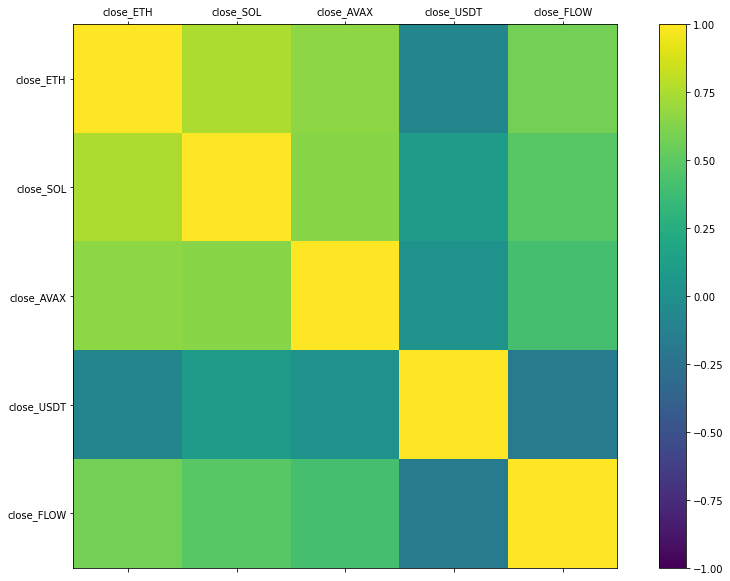

In [124]:
def graph_corr_plt(data):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
    
    correlations = df_return.corr()
    ax = fig.add_subplot(1,1,1)
    normalized = ax.matshow(correlations,vmin=-1,vmax=1)
    ax.set_title('Vizualization of the .corr() correlation plot')
    
    # add tick marks to the grid
    ticks=np.arange(0,9,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(tokens)
    ax.set_yticklabels(tokens)
    
    
    # add colorbar to aid in vis
    fig.colorbar(normalized)
    
    return _, axes
fig

[Text(0, 0, 'close_ETH'),
 Text(0, 1, 'close_SOL'),
 Text(0, 2, 'close_AVAX'),
 Text(0, 3, 'close_USDT'),
 Text(0, 4, 'close_FLOW')]

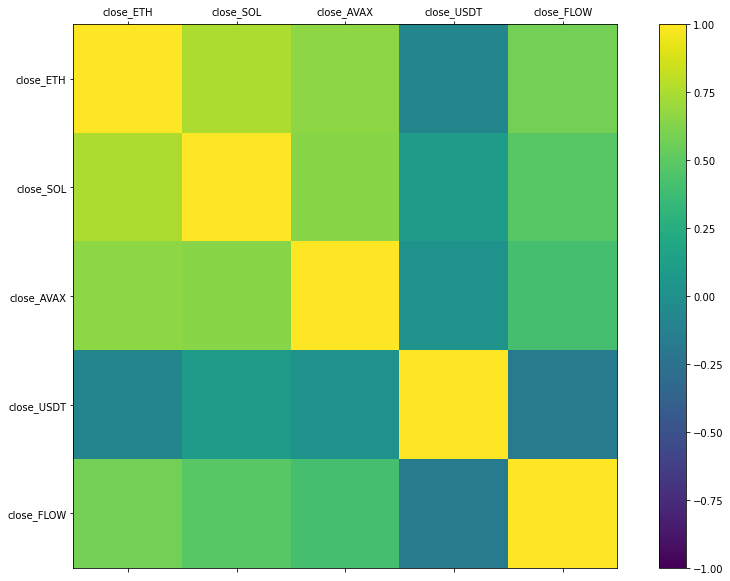

In [117]:
correlations = df_return.corr()
fig = plt.figure(figsize=(15,10))
ax=fig.add_subplot(1,1,1)
normalized = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(normalized)
ticks = np.arange(5)

ax.set_xticks(ticks)
ax.set_yticks(ticks)

label=[(f'close_{x}') for x in tokens]
ax.set_xticklabels(label)
ax.set_yticklabels(label)